<a href="https://colab.research.google.com/github/Mercymerine/Amdari21DayDataChallenge/blob/main/renewable_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Data loading**

In [2]:
turbine = pd.read_csv('/content/TexasTurbine.csv')
turbine.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [3]:
turbine.columns

Index(['Time stamp', 'System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)'],
      dtype='object')

In [4]:
turbine.shape

(8760, 6)

**Cleaning the data**

In [5]:
turbine.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [6]:
#Check for missing values
#Fix the timestamp
#Set the timestamp as index
#Check for duplicates

In [7]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time stamp                     8760 non-null   object 
 1   System power generated | (kW)  8760 non-null   float64
 2   Wind speed | (m/s)             8760 non-null   float64
 3   Wind direction | (deg)         8760 non-null   int64  
 4   Pressure | (atm)               8760 non-null   float64
 5   Air temperature | ('C)         8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [8]:
turbine.isnull().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

In [9]:
turbine['Time stamp']

0        Jan 1, 12:00 am
1        Jan 1, 01:00 am
2        Jan 1, 02:00 am
3        Jan 1, 03:00 am
4        Jan 1, 04:00 am
              ...       
8755    Dec 31, 07:00 pm
8756    Dec 31, 08:00 pm
8757    Dec 31, 09:00 pm
8758    Dec 31, 10:00 pm
8759    Dec 31, 11:00 pm
Name: Time stamp, Length: 8760, dtype: object

In [10]:
#Fixing the timestamp formart
turbine['Time stamp'] = pd.to_datetime(turbine['Time stamp'], format="%b %d, %I:%M %p").dt.strftime("%Y-%m-%d %H:%M:%S")

#Replace the year by 2021(the actual year)
turbine['Time stamp'] = turbine['Time stamp'].str.replace('1900', '2021')

#Convert to time stamp
turbine['Time stamp'] = pd.to_datetime(turbine['Time stamp'])

#Set time stamp to be the new index
turbine.index = turbine['Time stamp']

#Dropping the old column
turbine.drop('Time stamp', axis=1, inplace=True)

In [11]:
turbine.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
Time stamp,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963


In [12]:
#Checking for duplicates
turbine.duplicated().sum()

0

**Feature Engineering**

In [13]:
 #Extract the following information from the date index:day of the week, month, quarter


In [14]:
def extract_features(dataframe):
  '''
  This function extracts features from the date index of a dataframe
'''
  #Copy of the dataframe
  dataframe = dataframe.copy()
  dataframe['quarter'] = dataframe.index.quarter
  dataframe['month'] = dataframe.index.month
  dataframe['week'] =dataframe.index.isocalendar().week.astype(int)
  dataframe['hour'] = dataframe.index.hour

  return dataframe

def map_month_to_season(month):
   if  3 <= month <=5:
    return 'Spring'
   elif 6 <= month <=8:
    return 'Summer'
   elif 9 <= month <=11:
    return 'Fall'
   else:
    return 'Winter'

In [15]:
turbine = extract_features(turbine)
turbine

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),quarter,month,week,hour
Time stamp,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21


In [16]:
turbine['season'] = turbine['month'].apply(map_month_to_season)
turbine

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19,Winter
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20,Winter
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21,Winter


In [17]:
#View datatypes
turbine.dtypes

System power generated | (kW)    float64
Wind speed | (m/s)               float64
Wind direction | (deg)             int64
Pressure | (atm)                 float64
Air temperature | ('C)           float64
quarter                            int32
month                              int32
week                               int64
hour                               int32
season                            object
dtype: object

In [18]:
turbine.columns

Index(['System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)',
       'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

In [19]:
turbine.columns = ['power_generated', 'wind_speed',
       'wind_direction', 'pressure', 'air_temperature',
       'quarter', 'month', 'week', 'hour', 'season']

In [20]:
turbine.head()

,power_generated,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter


**EXPLORATORY DATA ANALYSIS**

In [21]:
#Univariate: power generated, wind speed, direction, temperature, pressure and season
#Multivariate

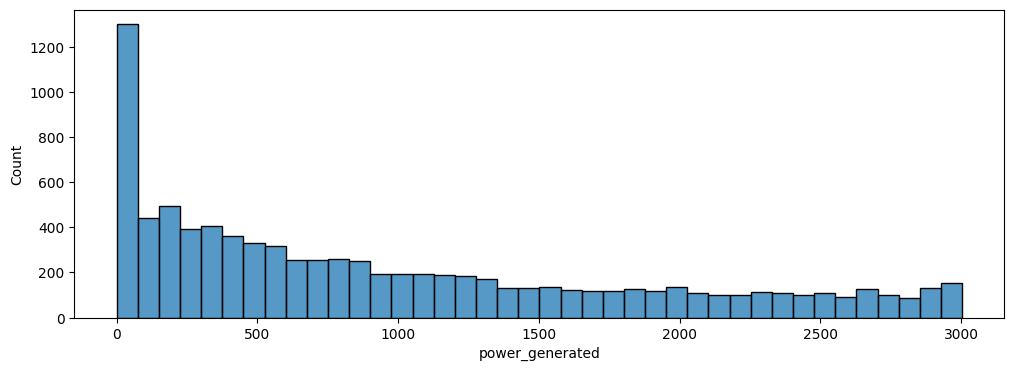

In [22]:
#Visualizing distribution for the power generated

#Specify the plot size
plt.figure(figsize = (12, 4))

#Create a histogram
sns.histplot(turbine['power_generated'], bins = 40)
plt.show()

In [23]:
turbine.power_generated.mean()

964.4679340166095

In [24]:
turbine.power_generated.describe()

count    8760.000000
mean      964.467934
std       878.558112
min         0.000000
25%       215.951500
50%       693.968500
75%      1562.287500
max      3004.010000
Name: power_generated, dtype: float64

In [25]:
#selecting out null power generated rows
turbine[turbine['power_generated']<=0]

#In 822 instances, we get power gen to be 0

,power_generated,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-05 00:00:00,0.0,2.491,156,0.991694,20.263,1,1,1,0,Winter
2021-01-05 01:00:00,0.0,0.484,95,0.994162,19.963,1,1,1,1,Winter
2021-01-07 22:00:00,0.0,2.788,340,1.002560,10.863,1,1,1,22,Winter
2021-01-07 23:00:00,0.0,2.116,273,1.001870,11.963,1,1,1,23,Winter
2021-01-08 00:00:00,0.0,2.897,284,1.000980,12.063,1,1,1,0,Winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 23:00:00,0.0,2.748,241,0.997129,13.863,4,12,52,23,Winter
2021-12-28 00:00:00,0.0,2.135,271,0.996338,14.163,4,12,52,0,Winter
2021-12-28 01:00:00,0.0,2.076,246,0.996338,14.163,4,12,52,1,Winter


In [26]:
turbine[turbine['power_generated']<=0]['season'].value_counts()

season
Fall      284
Winter    239
Summer    191
Spring    108
Name: count, dtype: int64

<ipython-input-27-311a6ce5b245>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y= season_counts, palette = 'viridis')


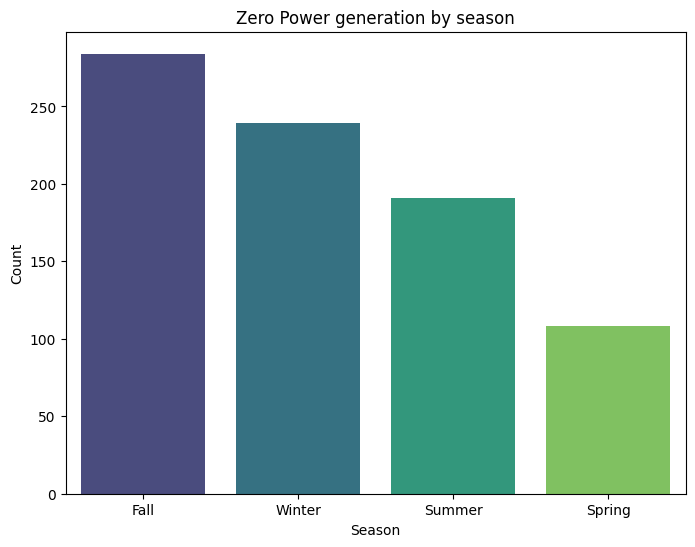

In [27]:
#barplot
season_counts = turbine[turbine['power_generated']<=0]['season'].value_counts()

plt.figure(figsize= (8, 6))
sns.barplot(x=season_counts.index, y= season_counts, palette = 'viridis')

plt.title('Zero Power generation by season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

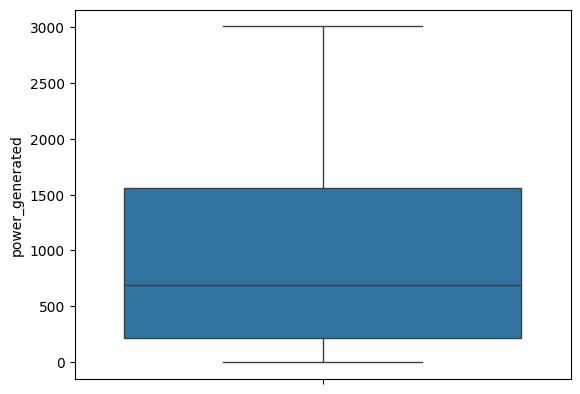

In [28]:
#Power generated
sns.boxplot(turbine['power_generated'])
plt.show()

There is an absence of outliers in the power generated column

In [29]:
turbine.columns

Index(['power_generated', 'wind_speed', 'wind_direction', 'pressure',
       'air_temperature', 'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

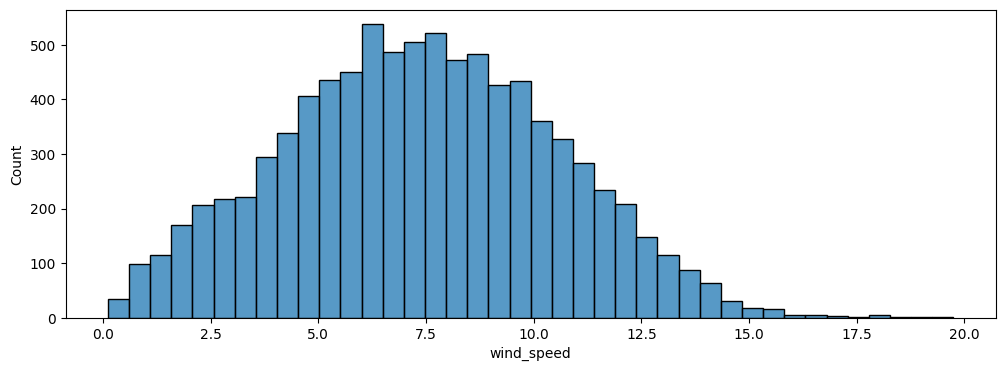

In [30]:
#Checking for the distribution of the windspeed
plt.figure(figsize = (12, 4))
sns.histplot(turbine['wind_speed'], bins=40)
plt.show()

The wind speed is normally distributed

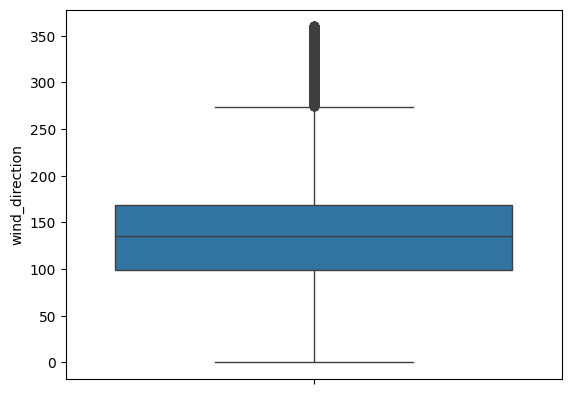

In [31]:
#Wind direction in box plot
sns.boxplot(turbine['wind_direction'])
plt.show()

Severity is not too large
You remove outliers by capping or transforming

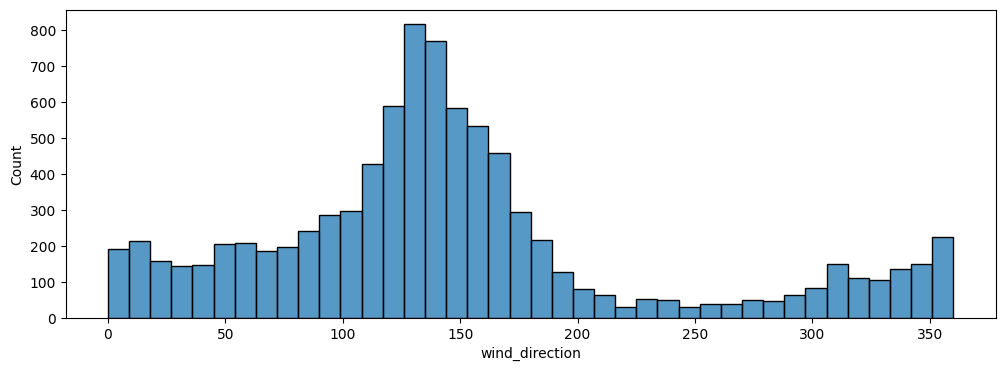

In [32]:
#Checking for the distribution of the winddirection
plt.figure(figsize = (12, 4))
sns.histplot(turbine['wind_direction'], bins=40)
plt.show()

Distribution of wind directin in angles is not strictly normal distribution

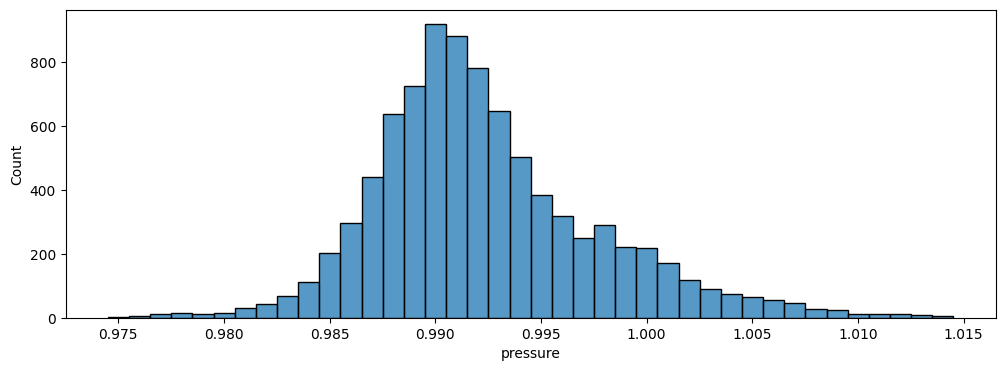

In [33]:
#Checking for the distribution of the pressure values
plt.figure(figsize = (12, 4))
sns.histplot(turbine['pressure'], bins=40)
plt.show()

In [34]:
turbine.columns

Index(['power_generated', 'wind_speed', 'wind_direction', 'pressure',
       'air_temperature', 'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

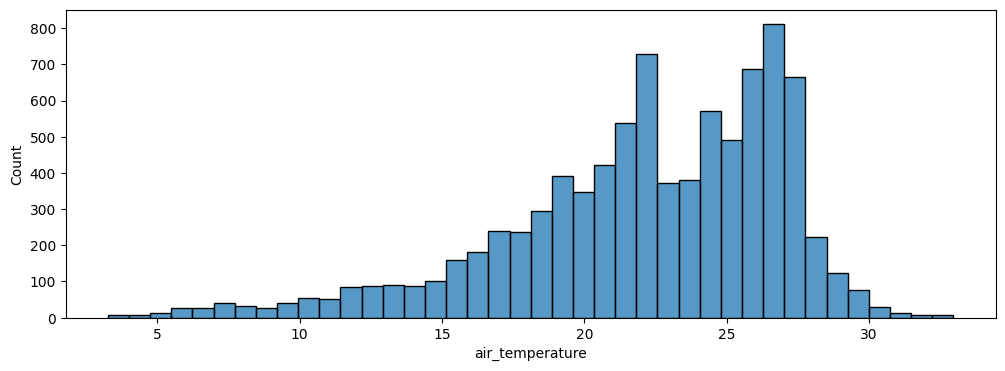

In [35]:
#Checking for the distribution of the temperature
plt.figure(figsize = (12, 4))
sns.histplot(turbine['air_temperature'], bins=40)
plt.show()

Temperature is skewed to the right probably due to the fact that warm days are more than cold days

In [36]:
#Multivariate

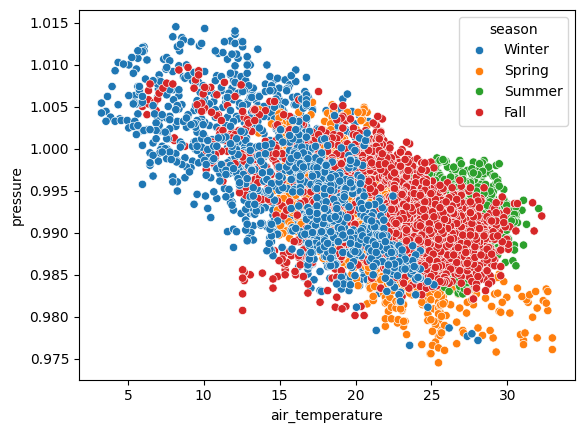

In [37]:
#temperature vs pressure
sns.scatterplot(data=turbine, x='air_temperature', y ='pressure', hue='season')
plt.savefig('temperature vs pressure.png')
plt.show()

Winter: cold days (lower temp, less than 20)
Spring: high temp at low pressure, and low temp at high pressure.
Summer: high pressure
Fall: widest range of temperature and pressure

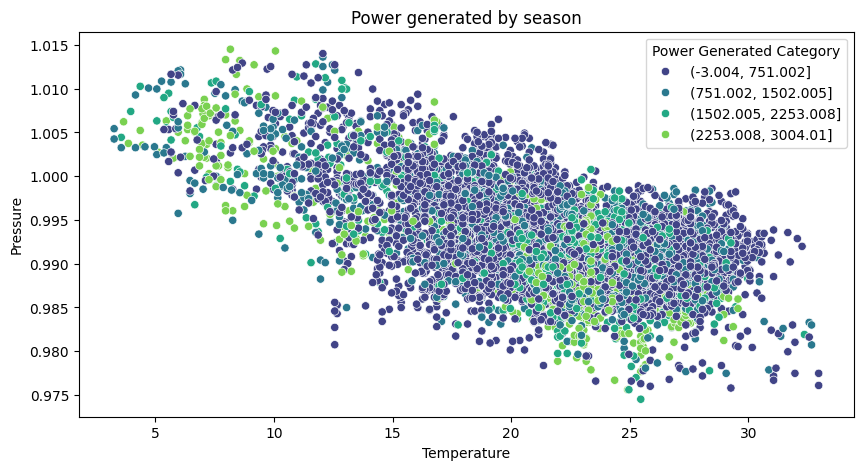

In [38]:
#Create bins of power generated values
num_bins = 4
binned_data = pd.cut(turbine['power_generated'], bins=num_bins)

#Creating figure and specifying sizes
plt.figure(figsize=(10, 5))
sns.scatterplot(data=turbine, x='air_temperature', y='pressure',  hue=binned_data, palette='viridis')
plt.title('Power generated by season')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(title='Power Generated Category', loc='upper right')
plt.show()

Nothing to infer other than large occurence of blue dots(0 t0 751)

<ipython-input-39-279bfe6b5fc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=turbine, x='season', y = 'power_generated', palette='coolwarm')


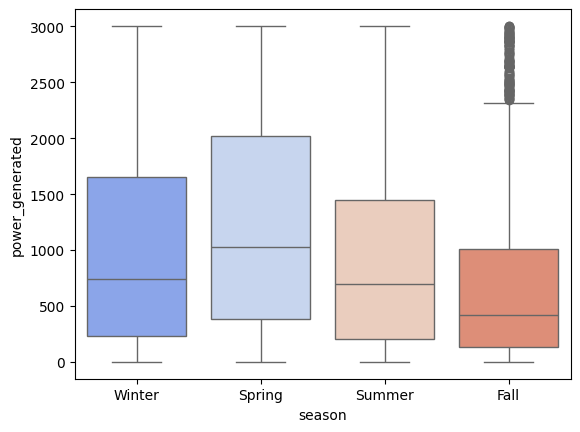

In [39]:
#Observe the effect of season on power generation
sns.boxplot(data=turbine, x='season', y = 'power_generated', palette='coolwarm')
plt.savefig('effect_of season_power_generation.png')
plt.show()

Spring is the most productive season for power generation and fall falls behind

<ipython-input-40-7f930758dd07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=turbine, x='month', y = 'power_generated', palette='coolwarm')


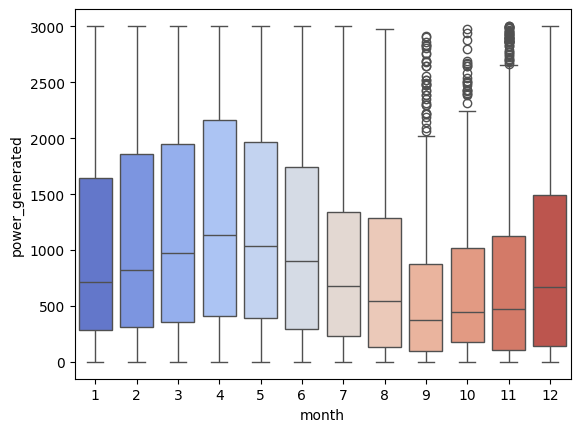

In [40]:
#month on power generation
sns.boxplot(data=turbine, x='month', y = 'power_generated', palette='coolwarm')
plt.show()

Cyclic pattern emerges when you compare power generated vs month

<ipython-input-41-33a7df5ebf49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=turbine, x='month', y ='wind_speed', palette='coolwarm')


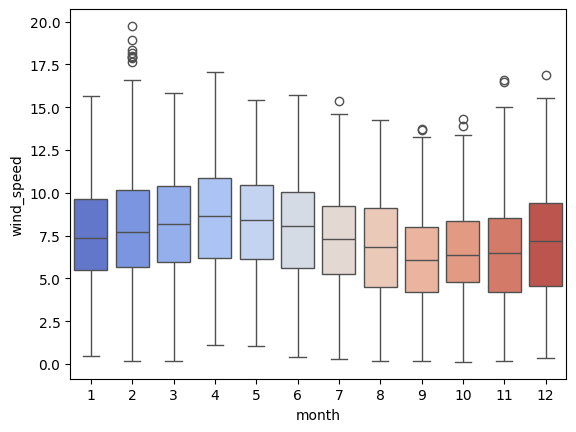

In [41]:
#month and wind speed
sns.boxplot(data=turbine, x='month', y ='wind_speed', palette='coolwarm')
plt.savefig('cyclic pattern of wind_speed _monthly.png')
plt.show()

Scatterplot for wind speed versus power generation

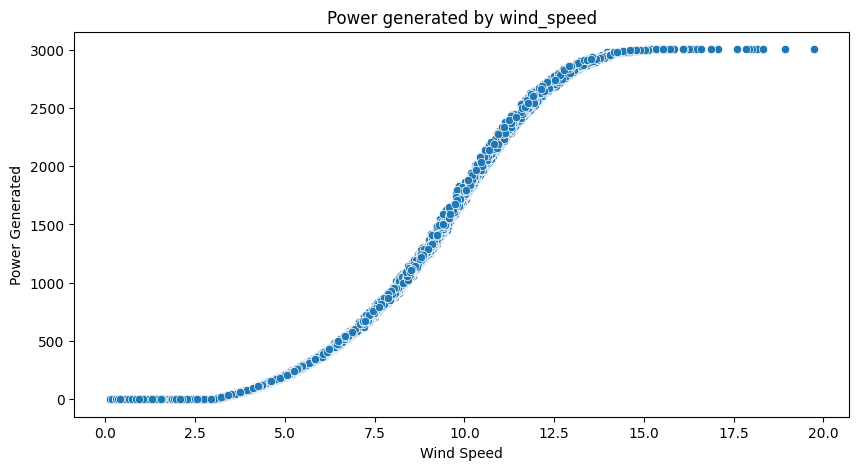

In [42]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=turbine, x='wind_speed', y='power_generated')
plt.title('Power generated by wind_speed')
plt.ylabel('Power Generated')
plt.xlabel('Wind Speed')
plt.savefig('power_generation_curve.png')
plt.show()

Power generatin curve

Wind speed less than 2.5 doesn't lead to power generatin

In [43]:
#turbine['wind_direction'] = pd.to_numeric(turbine['wind_direction'], errors='coerce')

In [44]:
turbine['wind_direction']

Time stamp
2021-01-01 00:00:00    128
2021-01-01 01:00:00    135
2021-01-01 02:00:00    142
2021-01-01 03:00:00    148
2021-01-01 04:00:00    150
                      ... 
2021-12-31 19:00:00    129
2021-12-31 20:00:00    118
2021-12-31 21:00:00    117
2021-12-31 22:00:00    116
2021-12-31 23:00:00    121
Name: wind_direction, Length: 8760, dtype: int64

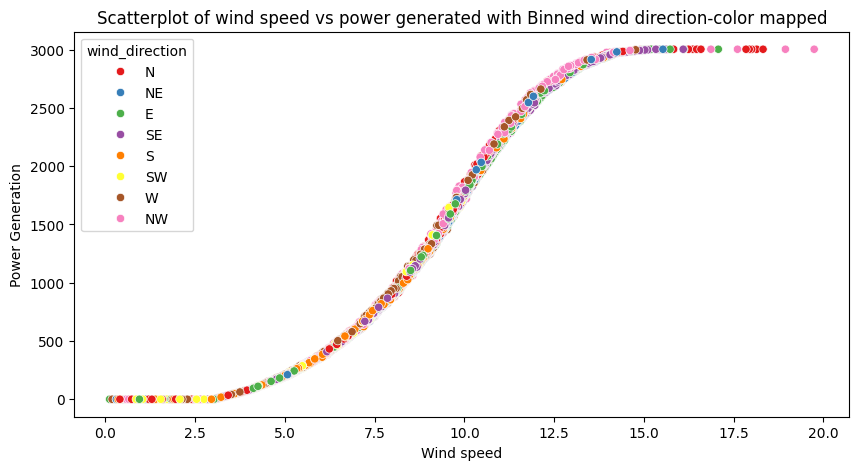

In [45]:
bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

bin_edge = [-1, 45, 90, 135, 180, 225, 270, 315, 360]

binned_data = pd.cut(turbine['wind_direction'], bins=bin_edge, labels=bin_labels)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=turbine, x='wind_speed', y='power_generated', hue=binned_data, palette='Set1')
plt.title('Scatterplot of wind speed vs power generated with Binned wind direction-color mapped')
plt.xlabel('Wind speed')
plt.ylabel('Power Generation')
plt.show()

<ipython-input-46-a6d3b8732609>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=turbine['power_generated'], x = binned_data, palette='viridis')


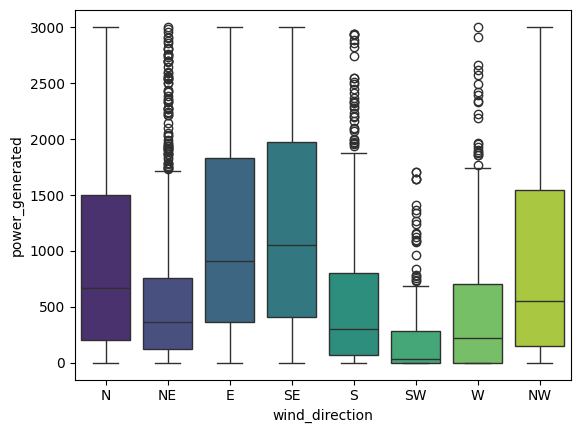

In [46]:
#month and wind speed
sns.boxplot(y=turbine['power_generated'], x = binned_data, palette='viridis')
plt.savefig('wind_direction_effect_on_power_generated.png')
plt.show()

Wind direction also affects the power generation value

In [47]:
turbine['wind_orientation'] = binned_data
turbine.head()

,power_generated,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter,E
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter,E
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter,SE
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter,SE
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter,SE


**ENCODING AND MODELLING**

In [48]:
len(turbine) * 0.3

2628.0

In [49]:
train_data = turbine[:-2628]
test_data = turbine[-2628:]

Reason for manually splitting the data is because ther is a pattern as a result of hourly recording affecting every feature and so selecting the train and tests randomly would affect this pattern the model is expected to follow through this pattern from bith the trianing and test data

In [50]:
train_data

,power_generated,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter,E
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter,E
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter,SE
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter,SE
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter,SE
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13 07:00:00,0.00,1.513,239,0.993169,26.863,3,9,37,7,Fall,SW
2021-09-13 08:00:00,0.00,1.770,276,0.991688,27.563,3,9,37,8,Fall,W
2021-09-13 09:00:00,0.00,1.977,328,0.992971,29.063,3,9,37,9,Fall,NW


Definition: Target encoding (mean encoding) involves replacing each category of a categorical variable with the mean of the target variable for that category.
Reason: This technique leverages the relationship between the categorical variable and the target variable, capturing valuable information about how different categories impact the target.

In [51]:
#Perfor mean encoding for the season
season_mean = train_data.groupby('season')['power_generated'].mean()
season_mean

season
Fall       867.021622
Spring    1221.768942
Summer     927.663718
Winter    1058.753692
Name: power_generated, dtype: float64

In [52]:
turbine['season_mean_encoded'] = turbine['season'].map(season_mean)
turbine.head()

,power_generated,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season,wind_orientation,season_mean_encoded
Time stamp,,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter,E,1058.753692
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter,E,1058.753692
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter,SE,1058.753692
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter,SE,1058.753692
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter,SE,1058.753692


In [53]:
wind_orientation_mean = train_data.groupby('wind_orientation')['power_generated'].mean()
turbine['wind_orientation_encoded'] = turbine['wind_orientation'].map(wind_orientation_mean)
turbine.head()

,power_generated,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season,wind_orientation,season_mean_encoded,wind_orientation_encoded
Time stamp,,,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter,E,1058.753692,1214.650349
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter,E,1058.753692,1214.650349
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter,SE,1058.753692,1248.372613
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter,SE,1058.753692,1248.372613
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter,SE,1058.753692,1248.372613


In [54]:
turbine.drop(['season', 'wind_orientation'], axis=1, inplace=True)

In [55]:
train_data = turbine[:-2628]
train_data

,power_generated,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season_mean_encoded,wind_orientation_encoded
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,1058.753692,1214.650349
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,1058.753692,1214.650349
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,1058.753692,1248.372613
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,1058.753692,1248.372613
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,1058.753692,1248.372613
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13 07:00:00,0.00,1.513,239,0.993169,26.863,3,9,37,7,867.021622,250.053972
2021-09-13 08:00:00,0.00,1.770,276,0.991688,27.563,3,9,37,8,867.021622,489.797900
2021-09-13 09:00:00,0.00,1.977,328,0.992971,29.063,3,9,37,9,867.021622,855.516311


In [56]:
test_data = turbine[-2628:]
test_data

,power_generated,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season_mean_encoded,wind_orientation_encoded
Time stamp,,,,,,,,,,,
2021-09-13 12:00:00,0.000,2.481,105,0.991981,32.263,3,9,37,12,867.021622,1214.650349
2021-09-13 13:00:00,127.025,4.469,101,0.990205,31.763,3,9,37,13,867.021622,1214.650349
2021-09-13 14:00:00,714.714,7.474,93,0.991391,29.763,3,9,37,14,867.021622,1214.650349
2021-09-13 15:00:00,1121.150,8.660,101,0.992279,28.863,3,9,37,15,867.021622,1214.650349
2021-09-13 16:00:00,623.060,7.177,103,0.989713,29.163,3,9,37,16,867.021622,1214.650349
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.700,8.848,129,0.998604,19.663,4,12,52,19,1058.753692,1214.650349
2021-12-31 20:00:00,1105.370,8.502,118,1.000090,19.063,4,12,52,20,1058.753692,1214.650349
2021-12-31 21:00:00,1405.710,9.224,117,0.998408,18.463,4,12,52,21,1058.753692,1214.650349


In [57]:
#Modelling
#Linear models: Linear Regression
#Support Vector machine: svm
#Ensemble: rf, gbr

In [58]:
#Imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [59]:
turbine.columns

Index(['power_generated', 'wind_speed', 'wind_direction', 'pressure',
       'air_temperature', 'quarter', 'month', 'week', 'hour',
       'season_mean_encoded', 'wind_orientation_encoded'],
      dtype='object')

In [60]:
#Splitting the datasets to train and test datasets
target = 'power_generated'
features = ['wind_speed', 'wind_direction', 'pressure',
       'air_temperature', 'quarter', 'month', 'week', 'hour',
       'season_mean_encoded', 'wind_orientation_encoded']

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

In [61]:
#Linear Regressin
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [62]:
#Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
#Support Vector Machine
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [64]:
#Gradient Boosting Regressin
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [65]:
#making predictins with models
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
gbr_predictions = gbr_model.predict(X_test)

In [66]:
#predicting on test and evaluating using mse
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)


In [67]:
print('linear regression', lr_mse)
print('Random Forest', rf_mse)
print('Gradient Boosting', gbr_mse)
print('SVM', svm_mse)

linear regression 80965.27593634969
Random Forest 142.556472152903
Gradient Boosting 70.17426423116535
SVM 608393.4168488852


In [68]:
#predicting on test and evaluating using mse
lr_mae = mean_absolute_error(y_test, lr_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)

In [69]:
print('linear regression', lr_mae)
print('Random Forest', rf_mae)
print('Gradient Boosting', gbr_mae)
print('SVM', svm_mae)

linear regression 228.93177190271575
Random Forest 5.553405257819607
Gradient Boosting 5.7311809447835875
SVM 620.6563659850767


In [70]:
y_test.mean()

739.5319913727169

In [71]:
#rf and gbr were by roughly 0.06%
5/739

0.006765899864682003

Hyperparameter tuning on gradient boosting regressor and random forest regressor

Hyperparameter tuning is a crucial step in optimizing machine learning models.HyperOPt is a Python library that provides a convenient wat to perform hyperparameter tuning using bayesian optimization techniques. Bayesian optimization is a probabilistic model-based optimization method that can efficiently search the hyperparameter space to find the optimal set of hypeparametrs for a given ml model

In [72]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [73]:
X_val = X_train[-1200:]
y_val = y_train[-1200:]

X_train = X_train[:-1200]
y_train = y_train[:-1200]

In [74]:
len(X_val)

1200

In [75]:
len(X_train)

4932

In [76]:
#Create a space
space = {
    'n_estimators':hp.quniform('n_estimators', 100, 300, 1),
    'max_depth':hp.quniform('max_depth', 5, 20, 1),
    'max_features':hp.choice('max_features', ['sqrt', 'log2', None])
    }

def objective(params):
  n_estimators = int(params['n_estimators'])
  max_depth = int(params['max_depth'])
  max_features = params['max_features']

  rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, random_state=42)
  rf_model.fit(X_train, y_train)
  predictions = rf_model.predict(X_val)
  mse = mean_squared_error(y_val, predictions)
  return {'loss': mse, 'status': STATUS_OK}

trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,
    verbose=1
)

print('Best Hyperparameters', best)

100%|██████████| 100/100 [06:30<00:00,  3.91s/trial, best loss: 27.772647898690312]
Best Hyperparameters {'max_depth': 15.0, 'max_features': 2, 'n_estimators': 240.0}


In [77]:
best_rf_hyperparameters = {'max_depth': 15.0, 'max_features': 2, 'n_estimators': 240.0}

In [78]:
#Create a space
space = {
    'n_estimators':hp.quniform('n_estimators', 100, 300, 1),
    'max_depth':hp.quniform('max_depth', 5, 20, 1),
    'learning_rate':hp.loguniform('learning_rate', -5.0, 0.0),
    'subsample':hp.uniform('subsample', 0.1, 1.0),

    }

def objective(params):
  n_estimators = int(params['n_estimators'])
  max_depth = int(params['max_depth'])


  gbr_model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=params['learning_rate'], subsample = params['subsample'],random_state=42)
  gbr_model.fit(X_train, y_train)
  predictions = gbr_model.predict(X_val)
  mse = mean_squared_error(y_val, predictions)
  return {'loss': mse, 'status': STATUS_OK}

trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,
    verbose=1
)

print('Best Hyperparameters', best)

100%|██████████| 100/100 [05:02<00:00,  3.02s/trial, best loss: 6.24769009250761]
Best Hyperparameters {'learning_rate': 0.02231178399690258, 'max_depth': 16.0, 'n_estimators': 300.0, 'subsample': 0.12022303519531549}


In [79]:
best_rf_hyperparameters = {'learning_rate': 0.03066954491992251, 'max_depth': 8.0, 'n_estimators': 291.0, 'subsample': 0.3241845120837209}

In [80]:
train_data = turbine[:-2628]
test_data = turbine[-2628:]

#Splitting the datasets to train and test datasets
target = 'power_generated'
features = ['wind_speed', 'wind_direction', 'pressure',
       'air_temperature', 'quarter', 'month', 'week', 'hour',
       'season_mean_encoded', 'wind_orientation_encoded']

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

In [81]:
best_rf_hyperparameters

{'learning_rate': 0.03066954491992251,
 'max_depth': 8.0,
 'n_estimators': 291.0,
 'subsample': 0.3241845120837209}

In [82]:
rf_model = RandomForestRegressor(max_depth=15, max_features=2, n_estimators=240)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print('MSE:', rf_mse, 'MAE', rf_mae)

MSE: 79740.38206728977 MAE 192.33487597916618


This is a case of overfitting

In [83]:
gbr_model = GradientBoostingRegressor(learning_rate=0.03066954491992251, max_depth= 8, n_estimators=291, subsample=0.3241845120837209)
gbr_model.fit(X_train, y_train)
gbr_predictions = gbr_model.predict(X_test)

gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)

print('MSE:', gbr_mse, 'MAE', gbr_mae)

MSE: 53.20507957650802 MAE 3.324983083870621


**BEST PERFORMING MODEL: GRADIENT BOOSTING REGRESSOR USING THE BEST HYPERPARAMETER**

**INFERENCE SCRIPT CREATION**

In [84]:
turbine = pd.read_csv('/content/TexasTurbine.csv')
features = turbine.sample(5)

features.columns = ['Time stamp', 'power_generated', 'wind_speed', 'wind_direction','pressure', 'air_temperature']
target = features['power_generated']
features.drop('power_generated', axis=1, inplace=True)

In [85]:
features

,Time stamp,wind_speed,wind_direction,pressure,air_temperature
671,"Jan 28, 11:00 pm",8.621,127,0.999298,16.663
5580,"Aug 21, 12:00 pm",6.980,102,0.991194,29.763
2646,"Apr 21, 06:00 am",8.097,138,0.985177,22.413
7423,"Nov 6, 07:00 am",12.654,28,0.997419,20.963
2781,"Apr 26, 09:00 pm",7.978,115,0.990804,22.463


In [86]:
def fix_timestamp(turbine):
  '''
  This function converts the datetime column to a proper format and makes it an index
  '''
  #Fixing the timestamp formart
  turbine['Time stamp'] = pd.to_datetime(turbine['Time stamp'], format="%b %d, %I:%M %p").dt.strftime("%Y-%m-%d %H:%M:%S")

  #Replace the year by 2021(the actual year)
  turbine['Time stamp'] = turbine['Time stamp'].str.replace('1900', '2021')

  #Convert to time stamp
  turbine['Time stamp'] = pd.to_datetime(turbine['Time stamp'])

  #Set time stamp to be the new index
  turbine.index = turbine['Time stamp']

  #Dropping the old column
  turbine.drop('Time stamp', axis=1, inplace=True)

  return turbine

In [87]:
fix_timestamp(features)

,wind_speed,wind_direction,pressure,air_temperature
Time stamp,,,,
2021-01-28 23:00:00,8.621,127,0.999298,16.663
2021-08-21 12:00:00,6.980,102,0.991194,29.763
2021-04-21 06:00:00,8.097,138,0.985177,22.413
2021-11-06 07:00:00,12.654,28,0.997419,20.963
2021-04-26 21:00:00,7.978,115,0.990804,22.463


In [88]:
features = extract_features(features)
features['season'] = features['month'].apply(map_month_to_season)
features

,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,
2021-01-28 23:00:00,8.621,127,0.999298,16.663,1,1,4,23,Winter
2021-08-21 12:00:00,6.980,102,0.991194,29.763,3,8,33,12,Summer
2021-04-21 06:00:00,8.097,138,0.985177,22.413,2,4,16,6,Spring
2021-11-06 07:00:00,12.654,28,0.997419,20.963,4,11,44,7,Fall
2021-04-26 21:00:00,7.978,115,0.990804,22.463,2,4,17,21,Spring


In [89]:
def bin_wind_direction(turbine):
  '''
  Takes in data and converts the wind direction in degrees to cardinal points
  '''
  #Define bin edge and direction
  bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
  bin_edge = [-1, 45, 90, 135, 180, 225, 270, 315, 360]

  #Bin the 'wind_direction' column and assign labels
  binned_data = pd.cut(turbine['wind_direction'], bins=bin_edge, labels=bin_labels)
  turbine['wind_orientation'] = binned_data
  return turbine

In [90]:
features = bin_wind_direction(features)

In [91]:
#WIND_ORIENTAION_MEAN =123
#SEASON_MEAN = 123

def mean_encode(turbine, season_mean = season_mean, wind_orientation_mean=wind_orientation_mean):
  turbine['season_mean_encoded'] = turbine['season'].map(season_mean)
  turbine['wind_orientation_encoded'] = turbine['wind_orientation'].map(wind_orientation_mean)
  turbine.drop(['season', 'wind_orientation'], axis=1, inplace=True)
  return turbine

In [92]:
features = mean_encode(features)
features


,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season_mean_encoded,wind_orientation_encoded
Time stamp,,,,,,,,,,
2021-01-28 23:00:00,8.621,127,0.999298,16.663,1,1,4,23,1058.753692,1214.650349
2021-08-21 12:00:00,6.980,102,0.991194,29.763,3,8,33,12,927.663718,1214.650349
2021-04-21 06:00:00,8.097,138,0.985177,22.413,2,4,16,6,1221.768942,1248.372613
2021-11-06 07:00:00,12.654,28,0.997419,20.963,4,11,44,7,867.021622,1007.939630
2021-04-26 21:00:00,7.978,115,0.990804,22.463,2,4,17,21,1221.768942,1214.650349


In [93]:
features

,wind_speed,wind_direction,pressure,air_temperature,quarter,month,week,hour,season_mean_encoded,wind_orientation_encoded
Time stamp,,,,,,,,,,
2021-01-28 23:00:00,8.621,127,0.999298,16.663,1,1,4,23,1058.753692,1214.650349
2021-08-21 12:00:00,6.980,102,0.991194,29.763,3,8,33,12,927.663718,1214.650349
2021-04-21 06:00:00,8.097,138,0.985177,22.413,2,4,16,6,1221.768942,1248.372613
2021-11-06 07:00:00,12.654,28,0.997419,20.963,4,11,44,7,867.021622,1007.939630
2021-04-26 21:00:00,7.978,115,0.990804,22.463,2,4,17,21,1221.768942,1214.650349


In [94]:
gbr_model.predict(features)

array([1160.43602823,  575.22478428,  920.69318187, 2756.34456989,
        890.67767843])

In [96]:
target

671     1159.500
5580     574.354
2646     922.724
7423    2751.880
2781     890.846
Name: power_generated, dtype: float64

In [97]:
def inference(features):
  features = fix_timestamp(features)
  features = extract_features(features)
  features['season'] = features['month'].apply(map_month_to_season)
  features = bin_wind_direction(features)
  features = mean_encode(features)
  predictions = gbr_model.predict(features)
  return predictions

In [ ]:
inference(features)

In [98]:
turbine = pd.read_csv('/content/TexasTurbine.csv')
features = turbine.sample(1)

features.columns = ['Time stamp', 'power_generated', 'wind_speed', 'wind_direction','pressure', 'air_temperature']
target = features['power_generated']
features.drop('power_generated', axis=1, inplace=True)
features

,Time stamp,wind_speed,wind_direction,pressure,air_temperature
4517,"Jul 8, 05:00 am",5.981,155,0.992282,25.663


In [99]:
inference(features)

array([358.72310048])

In [100]:
target

4517    357.983
Name: power_generated, dtype: float64